In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
## Import train data
df_train=pd.read_csv('Black_Friday_Dataset/train.csv')

In [45]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
## Import test data
df_test=pd.read_csv('Black_Friday_Dataset/test.csv')

In [47]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [48]:
## Merge test and train data
df = pd.concat([df_train, df_test], ignore_index=True)

In [49]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [50]:
df.shape

(783667, 12)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [52]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [53]:
## Drop user id 
df.drop('User_ID',axis=1,inplace=True) #Axis=1 means column wise

In [54]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [55]:
df.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

## Handling Categorical Feature

In [56]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [57]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [58]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [59]:
import sklearn

In [60]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Age_new']=le.fit_transform(df['Age'])

In [61]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0,6


In [62]:
df.drop('Age',axis=1,inplace=True)  ##axis 1 is for column

In [63]:
df.head()

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new
0,P00069042,0,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,16,C,4+,0,8,NaN,NaN,7969.0,6


In [64]:
##Another way is using map
##df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+'}:7)

In [65]:
## Now to age column to its original place we can apply this
# Remove Age column and re-insert at original index
# col = df.pop('Age')
# df.insert(2, 'Age', col)


In [66]:
df.City_Category.value_counts()

City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64

In [67]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [68]:
##df['City_Category']=df['City_Category'].map({'A':1,'B':2,'C':3})  -->it returns NaN 

## we can use pd.get_dummies(column_name) then concat it to df 

In [69]:
df.head()

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new
0,P00069042,0,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,16,C,4+,0,8,NaN,NaN,7969.0,6


In [70]:
df['City_Category'].apply(repr).unique()


array(["'A'", "'C'", "'B'"], dtype=object)

In [71]:
df['City_Category'] = df['City_Category'].astype(str).str.strip().map({'A': 1, 'B': 2, 'C': 3})


In [72]:
df.head()

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new
0,P00069042,0,10,1,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,10,1,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,10,1,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,10,1,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,16,3,4+,0,8,NaN,NaN,7969.0,6


## Missing Values

In [73]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Age_new                            0
dtype: int64

In [74]:
## Focus on replacing missing values 
## We have to handle missing values for column Product_category_2 and column Product_category_3 because Purchase is null in test data and it is totally okay because we have to predict Purchase and it is obvious that it is not present in test data


In [75]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [76]:
## Here we have descrete features so mode is a better way to replace nan values
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


In [77]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [78]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [79]:
## Again all are descrete
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [80]:
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [81]:
df.head()

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new
0,P00069042,0,10,1,2,0,3,8.0,16.0,8370.0,0
1,P00248942,0,10,1,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,10,1,2,0,12,8.0,16.0,1422.0,0
3,P00085442,0,10,1,2,0,12,14.0,16.0,1057.0,0
4,P00285442,1,16,3,4+,0,8,8.0,16.0,7969.0,6


In [82]:
df.dtypes

Product_ID                     object
Gender                          int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age_new                         int64
dtype: object

In [83]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [84]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',' ')

In [85]:
df.head()

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new
0,P00069042,0,10,1,2,0,3,8.0,16.0,8370.0,0
1,P00248942,0,10,1,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,10,1,2,0,12,8.0,16.0,1422.0,0
3,P00085442,0,10,1,2,0,12,14.0,16.0,1057.0,0
4,P00285442,1,16,3,4,0,8,8.0,16.0,7969.0,6


In [86]:
df.dtypes

Product_ID                     object
Gender                          int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age_new                         int64
dtype: object

In [87]:
## Still Stay_In_Current_City_Years in object

## Now convert object into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [88]:
df.dtypes

Product_ID                     object
Gender                          int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age_new                         int64
dtype: object

In [89]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00030342',
       'P00074942', 'P00253842'], shape=(3677,), dtype=object)

In [90]:
df['Product_ID'].value_counts()

Product_ID
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00172942       1
P00236842       1
P00030342       1
P00062542       1
P00353042       1
Name: count, Length: 3677, dtype: int64

## Visualization

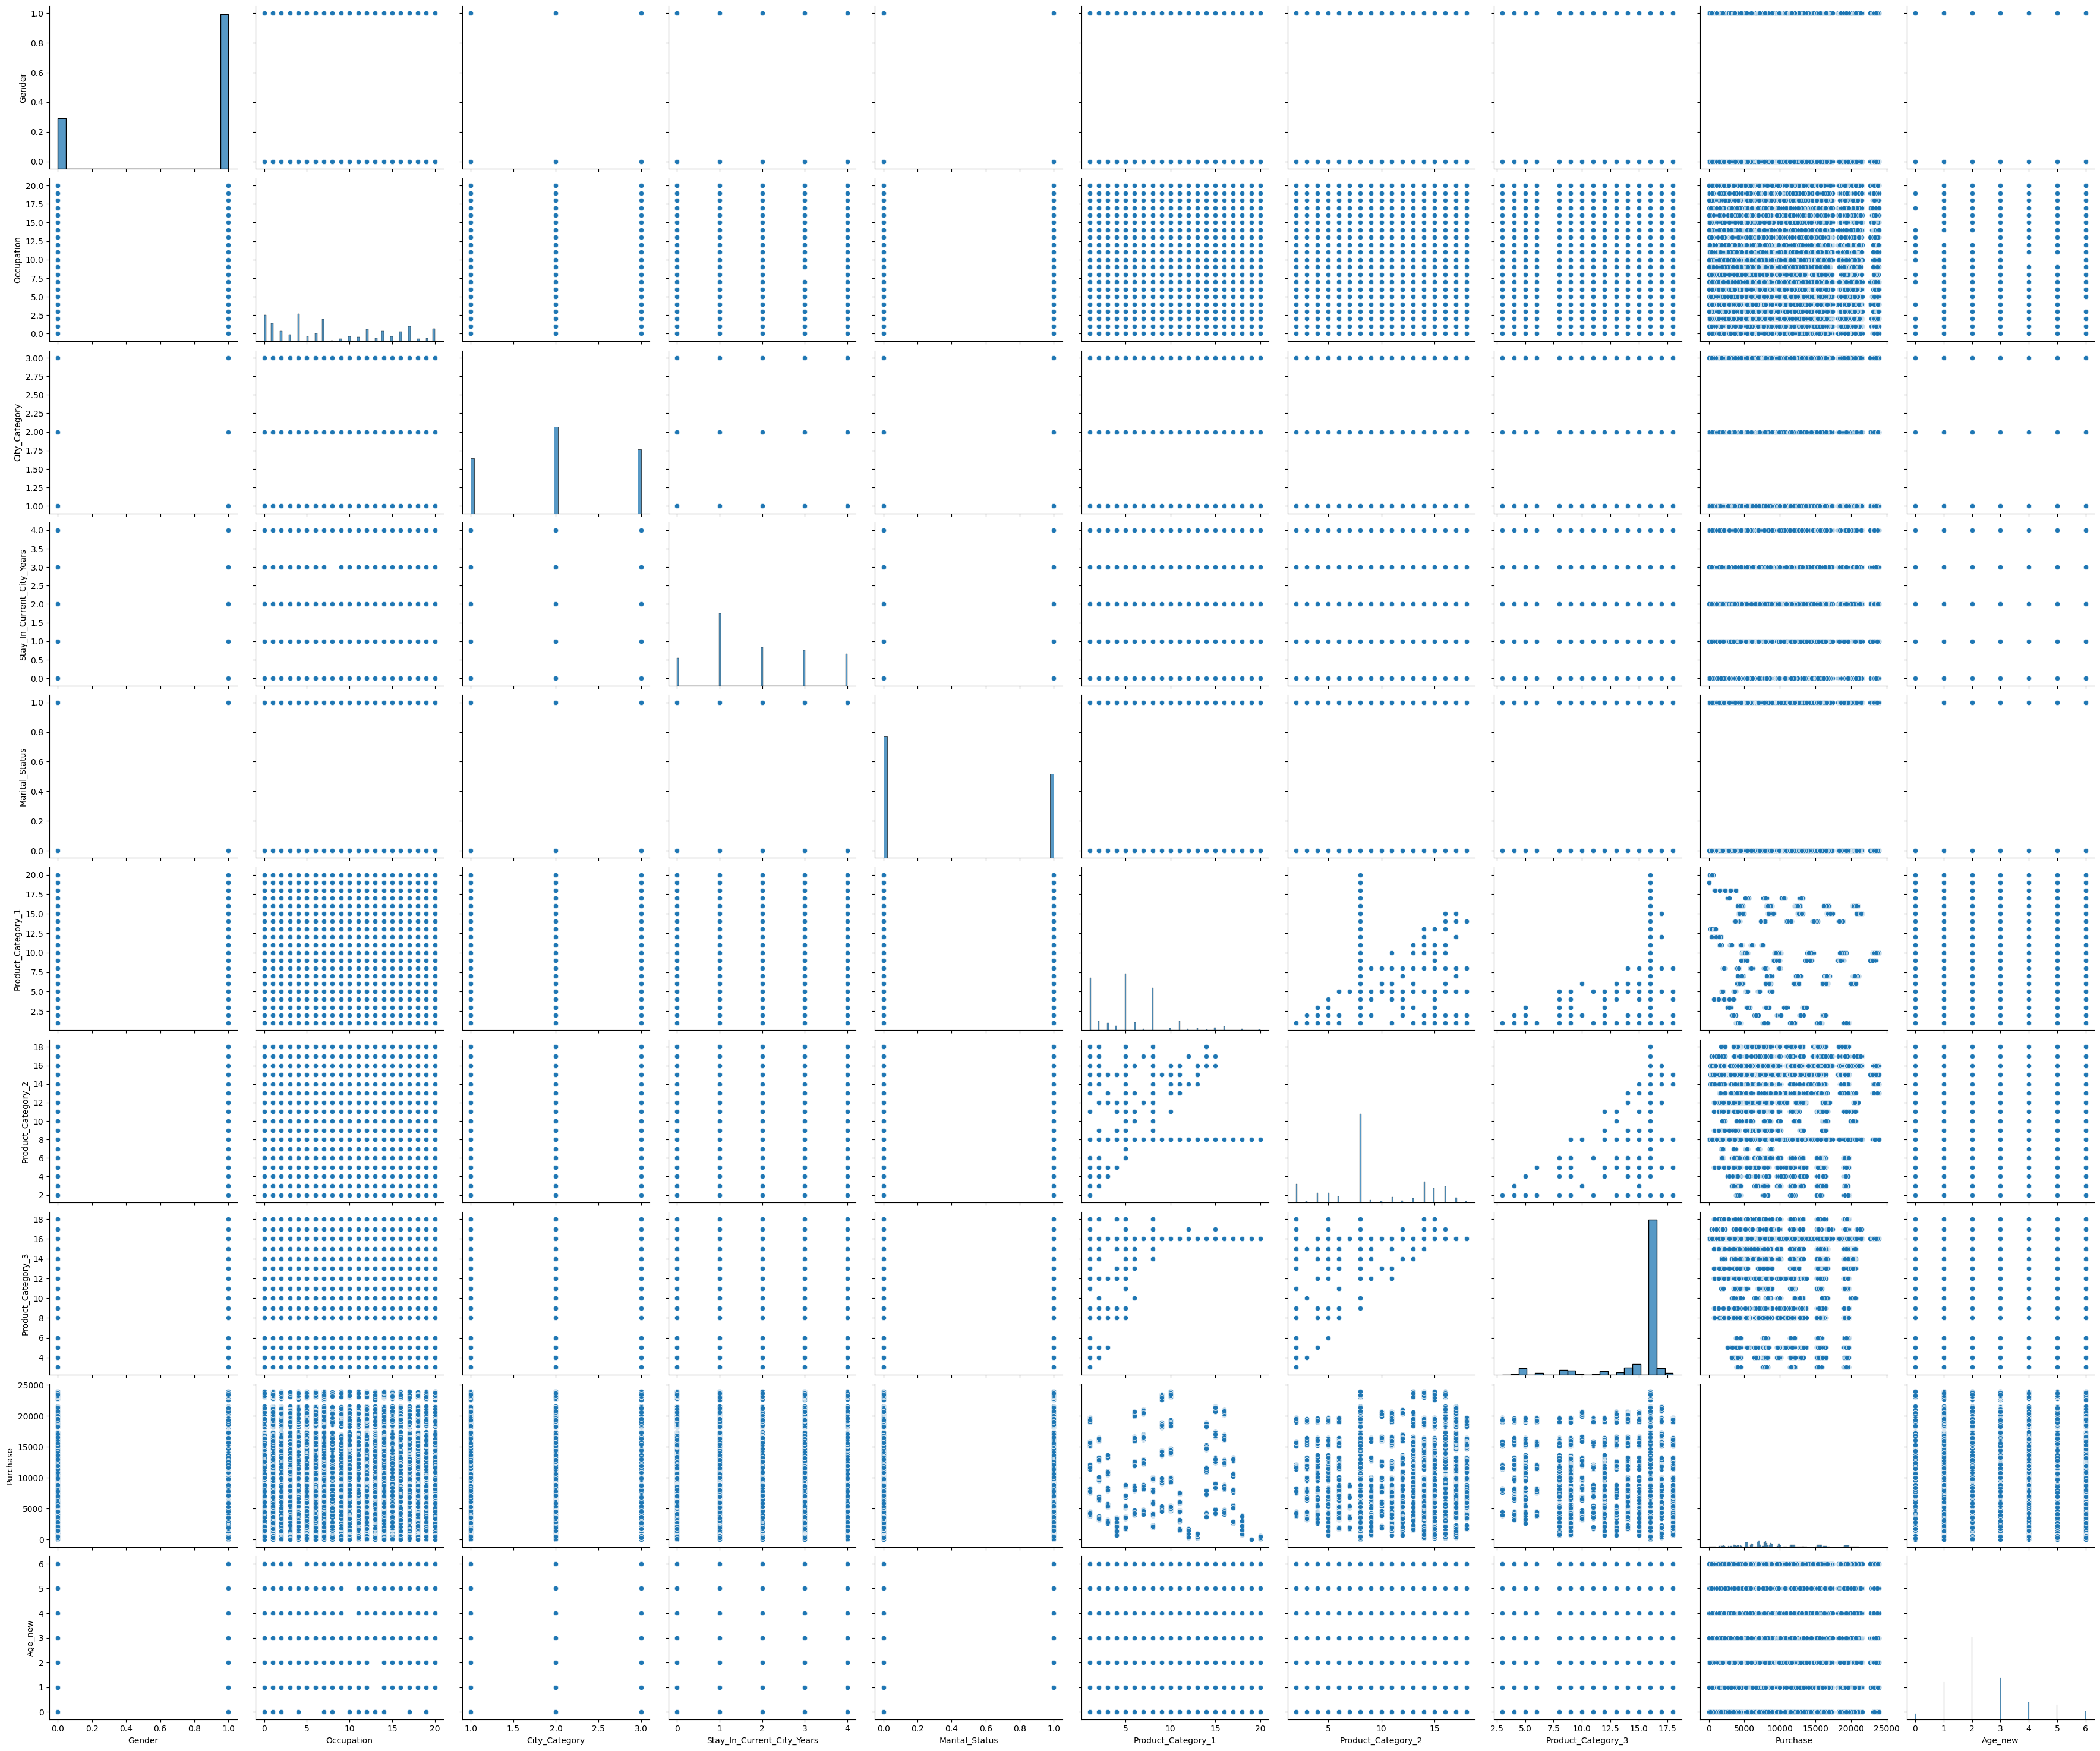

In [92]:
sns.pairplot(df,height=3,aspect=1.2)

<Axes: xlabel='Age_new', ylabel='Purchase'>

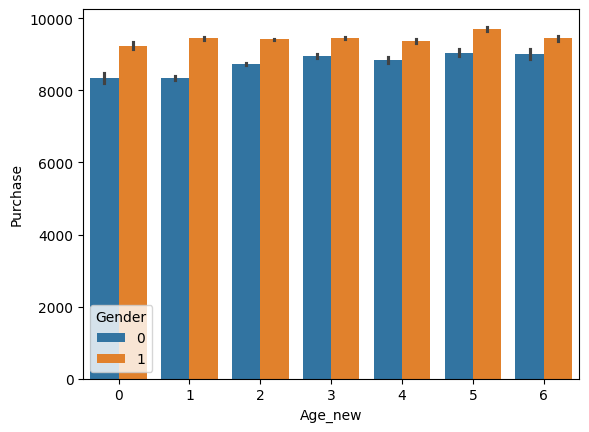

In [95]:
sns.barplot(x='Age_new', y='Purchase', hue='Gender', data=df)


#### Observation : Purchasing products by male is higher than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

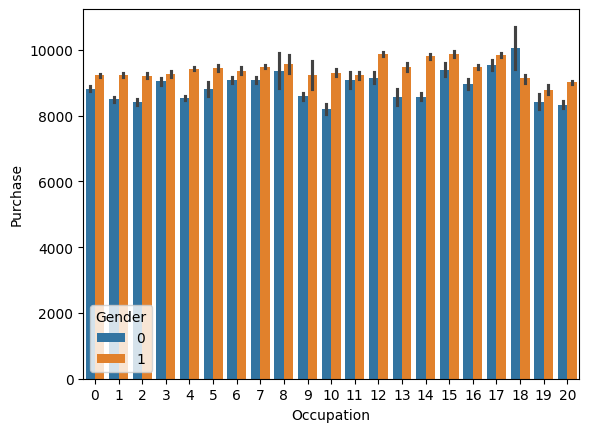

In [96]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

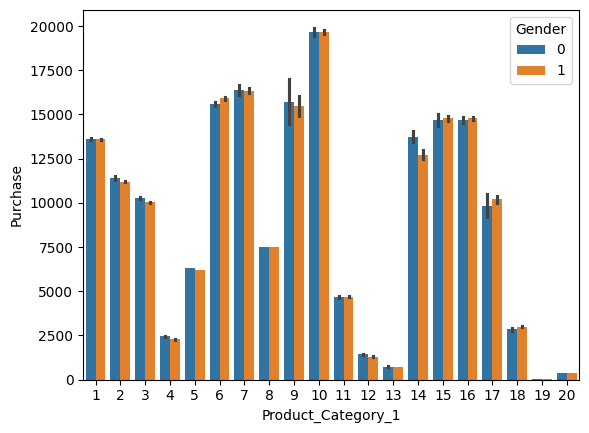

In [97]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

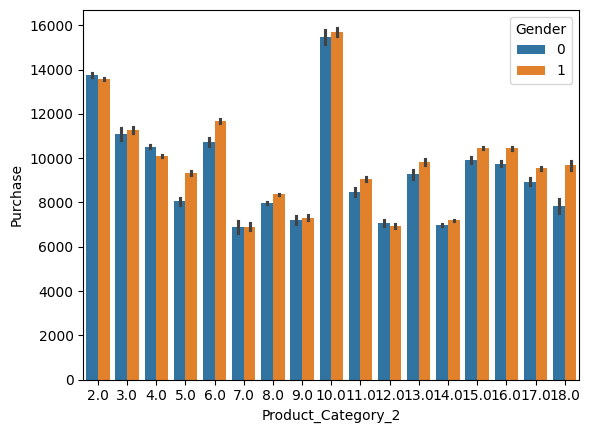

In [98]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

In [99]:
df.dtypes

Product_ID                     object
Gender                          int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age_new                         int64
dtype: object

In [100]:
## We can drop productID
df.drop('Product_ID',axis=1,inplace=True) 

In [101]:
df.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new
0,0,10,1,2,0,3,8.0,16.0,8370.0,0
1,0,10,1,2,0,1,6.0,14.0,15200.0,0
2,0,10,1,2,0,12,8.0,16.0,1422.0,0
3,0,10,1,2,0,12,14.0,16.0,1057.0,0
4,1,16,3,4,0,8,8.0,16.0,7969.0,6


In [102]:
df.dtypes

Gender                          int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age_new                         int64
dtype: object

## Feature Scaling

In [103]:
df_test=df[df['Purchase'].isnull()]

In [104]:
df_train=df[~df['Purchase'].isnull()]

In [112]:
X= df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
##Train the model